# ARIMA and Seasonal ARIMA Model

## Autoregressive Integrated Moving Average

1. Visualize the Time Series Data
2. Check stationarity
3. Make the time series data stationary
4. Plot the Correlation and AutoCorrelation Charts . Select AR and MA terms . 
5. Build the model
6. Use the model to make predictions


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('Perrin_Freres_monthly_champagne_sales_millions.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [105]:
df.shape

(107, 2)

In [106]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [107]:
df = df.dropna()

In [108]:
df.shape

(105, 2)

In [109]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [110]:
df1 = df.rename(columns = {'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'})
df1.tail(3)

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [111]:
df1['Month'] = pd.to_datetime(df1['Month']) 
print(df1.head())
print(df1.dtypes)

       Month   Sales
0 1964-01-01  2815.0
1 1964-02-01  2672.0
2 1964-03-01  2755.0
3 1964-04-01  2721.0
4 1964-05-01  2946.0
Month    datetime64[ns]
Sales           float64
dtype: object


In [112]:
df1.set_index('Month', inplace = True)
df1.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


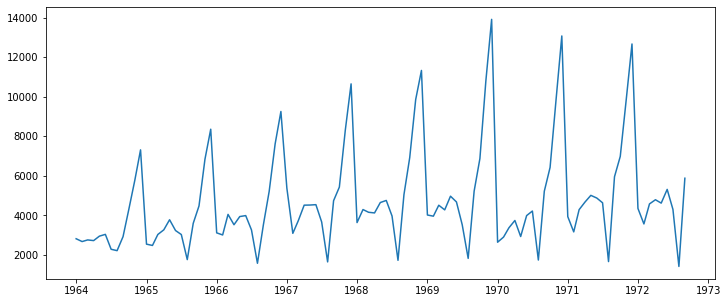

In [113]:
plt.figure(figsize = (12, 5))
plt.plot(df1)
plt.show()

A stationary time series is one whose properties do not depend on the time at which the series is observed.
we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1.constant mean

2.constant variance

3.an autocovariance that does not depend on time.

There are 2 major reasons behind non-stationaruty of a TS:

1.Trend – varying mean over time.

2.Seasonality – variations at specific time-frames.

**To check stationarity we use Augmented Dickey-Fuller test

# The Augmented Dickey-Fuller test 



**The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


•	Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.


•	Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).


In [114]:
# Test for Stationarity

from statsmodels.tsa.stattools import adfuller


In [115]:
def adfuller_test(sales):

    result =adfuller(sales)
    print("ADF Statistic: {}".format(result[0]))
    print("p-value: {}" .format(result[1]))
    print("lags : {}".format(result[2]))
    print("No. of observations : {}".format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [116]:
adfuller_test(df1['Sales'])

ADF Statistic: -1.8335930563276237
p-value: 0.3639157716602447
lags : 11
No. of observations : 93
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [117]:
from numpy import log
df1['Sales'] = log(df1['Sales'])

In [118]:
adfuller_test(df1['Sales'])

ADF Statistic: -2.255118601284443
p-value: 0.1868517311168676
lags : 13
No. of observations : 91
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The two most common ways to make a non-stationary time series curve stationary are:
1. Transformation
2. Differencing


## Transforming

A simple but often effective way to stabilize the variance across time is to
apply a transformation (square root, cube root, log, etc) to the time series.

In [135]:
from numpy import log
df1['log_transform'] = log(df1['Sales'])
df1['log_transform']


Month
1964-01-01    2.072255
1964-02-01    2.065670
1964-03-01    2.069539
1964-04-01    2.067970
1964-05-01    2.077966
                ...   
1972-05-01    2.132712
1972-06-01    2.149169
1972-07-01    2.124165
1972-08-01    1.981480
1972-09-01    2.160883
Name: log_transform, Length: 105, dtype: float64

In [137]:
adfuller_test(df1['log_transform'])

ADF Statistic: -2.291426408671262
p-value: 0.17474803706257053
lags : 13
No. of observations : 91
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

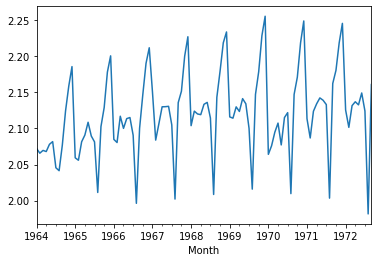

In [146]:
df1['log_transform'].plot()

 Clearly log transformation method is not working.

## Differencing (Integrated)




In order to make series stationary, we take a difference between the data points. So let us say, our original time series was:
X1, X2, X3,...........Xn


Now, series with difference of degree 1 becomes:
(X2 - X1, X3 - X2, X4 - X3,.......Xn - X(n-1)

Once, we take the difference, plot the series and see if there is any improvement in the the acf curve. If not, we can try  second or even a third order differencing. Remember, the more we difference, the more complicated our analysis is becoming.


In [147]:
df1['Sales'].shift(1).head()


Month
1964-01-01         NaN
1964-02-01    7.942718
1964-03-01    7.890583
1964-04-01    7.921173
1964-05-01    7.908755
Name: Sales, dtype: float64

In [148]:
# As the data is seasional and each year consists 12 month, from the graph we are seeing that the per cycle difference
# of the data is 12 months.
df1['Seasonal First Difference']=df1['Sales']-df1['Sales'].shift(12) 
df1

,Sales,Seasonal First Difference,log_transform
Month,,,
1964-01-01,7.942718,NaN,2.072255
1964-02-01,7.890583,NaN,2.065670
1964-03-01,7.921173,NaN,2.069539
1964-04-01,7.908755,NaN,2.067970
1964-05-01,7.988204,NaN,2.077966
...,...,...,...
1972-05-01,8.437717,-0.081474,2.132712
1972-06-01,8.577724,0.086053,2.149169
1972-07-01,8.365905,-0.075055,2.124165


In [149]:
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF Statistic: -3.617320904920117
p-value: 0.005438393674347496
lags : 2
No. of observations : 90
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

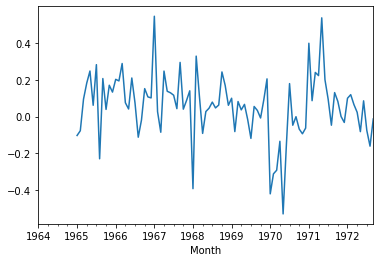

In [153]:
df1['Seasonal First Difference'].plot()

Note : As the P-Value is now less than 0.05, we can easily say that the data or series is Stationary

## ARIMA Model
An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful
method for making skillful time series forecasts.

**ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average.

## Auto Regressive Model

An autoregressive model predicts future behavior based on past behavior.
It’s used for forecasting when there is some correlation between values in a time series and the values that precede and
succeed them.



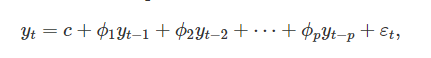

•	$y_{t-1}, y_{t-2}…y_{t-p}$ are the past series values (Lags: Lags are where results from one time period 
    affect following periods),

•	At is white noise (i.e. randomness),



## Moving Average
A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of
averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean .
Variations include: simple, and cumulative, or weighted forms.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.
The predictors depend on the parameters (p,d,q) of the ARIMA model:

•Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors
 for x(t) will be x(t-1)….x(t-5).
 
 
•Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5,
 the predictors for x(t) will be
 e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
 
 
•Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order 
 difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate
 same results.


 # Plotting ACF and PACF

ACF = Auto correlation function
PACF= Partial Auto correlation function

ACF and PACF are used to find the best lag value for the model.

PACF is most suitable for AR model.
And ACF is most suitable for MA model.


shuts off - The abrupt decrease in PACF. It normally happens in PACF only. And in ACF the decrease is exponential.

In [154]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

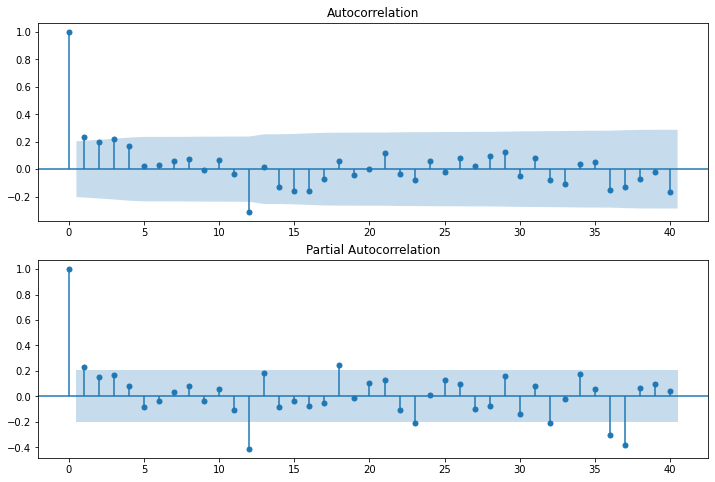

In [156]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

Note : In our case, p = 1 (As abrupt decrease happens in 1) ,d = 1, q = 0 (As we can't see any exponential decrease in ACF. The decrease in ACF is also abrupt. But in this case, we can also consider an exponential decrease in 1.
Then q value can also be 1.)

In [157]:
# ARIMA should be selected when data is non-seasonal . But in this case data is seasonal
from statsmodels.tsa.arima_model import ARIMA

In [176]:
model=ARIMA(df1['Sales'],order=(1,1,1))    # order : (p,d,q)

C:\Users\gis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\gis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [177]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.630
Method:                       css-mle   S.D. of innovations              0.434
Date:                Fri, 20 Nov 2020   AIC                            133.260
Time:                        01:50:30   BIC                            143.837
Sample:                    02-01-1964   HQIC                           137.545
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0043      0.002      2.021      0.043       0.000       0.009
ar.L1.D.Sales     0.3614      0.092      3.917      0.000       0.181       0.542
ma.L1.D.Sales    -1.0000      0.028    -36.065      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7668           +0.0000j            2.7668            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

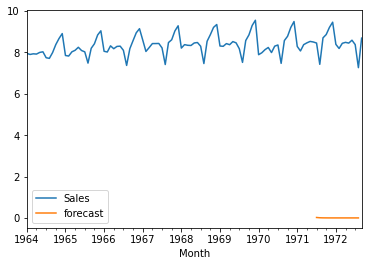

In [178]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Sales','forecast']].plot()

# SARIMA Model

In [179]:
# for seasonal data
import statsmodels.api as sm

In [180]:
model_sarimax = sm.tsa.statespace.SARIMAX(df1['Sales'],
                                          order = (1,1,1),                  # order = (p, d, q)
                                          seasonal_order = (1,1,1, 12))     # seasonal_order = (p, d, q, shift)  
model_sarimax_fit = model_sarimax.fit()

C:\Users\gis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\gis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Month'>

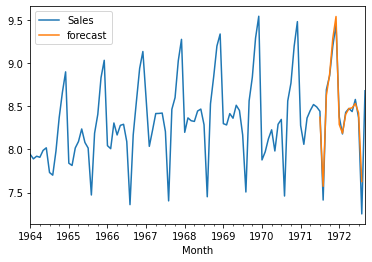

In [182]:
df1['forecast']=model_sarimax_fit.predict(start=90, end=103, dynamic=True)     
# 90 and 103 are the index range to be predicted
df1[['Sales','forecast']].plot()